<a href="https://colab.research.google.com/github/alex-anhvuong/data-analysis-python/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetch data


In [1]:
!pip install tweepy

In [2]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install credentials

In [5]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [6]:
# We create an extractor object:
extractor = twitter_setup()

query = "@JoeBiden"
tweets = []

# Search for #JoeBiden
for tweet in tweepy.Cursor(extractor.search, q=query, count = 100).items():
    tweets.append(tweet)

# # We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.created_at)
    print()

5 recent tweets:

2021-06-28 01:07:22

2021-06-28 01:06:38

2021-06-28 01:03:29

2021-06-28 01:03:08

2021-06-28 01:02:17



In [9]:
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
print("Content of 5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print("----------------------")

Content of 5 recent tweets:

#JoeBiden is so slow it takes him an hour and half to watch "60 Minutes" https://t.co/NErasBtFuP
----------------------
Just here to bang t-shirt
Available on Amazon
https://t.co/i3QJpbH9hJ

#4thofjuly #independenceday #usa #america… https://t.co/mUp0N1xmot
----------------------
RT @andykupf: Biden’s gotten more than his fair share of criticism, so some perspective

Joe and Jill

Climbed Capitol Hill

To bring back…
----------------------
RT @DrEstella: .@POTUS @JoeBiden #JoeBiden hahaha 😝 even to the meeting with #PutinBidenSummit @KremlinRussia_E you take tour cheat cards!…
----------------------
RT @andykupf: Biden’s gotten more than his fair share of criticism, so some perspective

Joe and Jill

Climbed Capitol Hill

To bring back…
----------------------


# Create dataframe


In [10]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,#JoeBiden is so slow it takes him an hour and ...
1,Just here to bang t-shirt\nAvailable on Amazon...
2,RT @andykupf: Biden’s gotten more than his fai...
3,RT @DrEstella: .@POTUS @JoeBiden #JoeBiden hah...
4,RT @andykupf: Biden’s gotten more than his fai...
5,RT @Antonio78158191: Que pronto sustituyó #Joe...
6,RT @casalsbate: El hombre empezó a calentar lo...
7,#JoeBiden is #Pro_Human_Rights\nJoe Biden warn...
8,RT @andykupf: Biden’s gotten more than his fai...
9,RT @ayfaraho: الرئيس المقبل للولايات المتحدة ا...


In [11]:
# Internal methods of a single tweet object:
# dir() returns all properties and methods
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [12]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1409317468078854145
2021-06-28 01:07:22
Twitter Web App
0
0
None
None
{'hashtags': [{'text': 'JoeBiden', 'indices': [0, 9]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1409317455651028998, 'id_str': '1409317455651028998', 'indices': [73, 96], 'media_url': 'http://pbs.twimg.com/media/E47mwk_WQAYcwkh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/E47mwk_WQAYcwkh.jpg', 'url': 'https://t.co/NErasBtFuP', 'display_url': 'pic.twitter.com/NErasBtFuP', 'expanded_url': 'https://twitter.com/PunionOnion/status/1409317468078854145/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 425, 'resize': 'fit'}, 'large': {'w': 1280, 'h': 800, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 750, 'resize': 'fit'}}}]}


In [14]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [15]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,#JoeBiden is so slow it takes him an hour and ...,96,1409317468078854145,2021-06-28 01:07:22,Twitter Web App,0,0
1,Just here to bang t-shirt\nAvailable on Amazon...,137,1409317283093168130,2021-06-28 01:06:38,Twitter for Android,1,0
2,RT @andykupf: Biden’s gotten more than his fai...,139,1409316489396690946,2021-06-28 01:03:29,Twitter for iPad,0,27
3,RT @DrEstella: .@POTUS @JoeBiden #JoeBiden hah...,139,1409316400062205954,2021-06-28 01:03:08,Twitter for Android,0,23
4,RT @andykupf: Biden’s gotten more than his fai...,139,1409316187767513094,2021-06-28 01:02:17,Twitter for Android,0,27
5,RT @Antonio78158191: Que pronto sustituyó #Joe...,95,1409315664356065285,2021-06-28 01:00:12,Twitter for Android,0,63
6,RT @casalsbate: El hombre empezó a calentar lo...,140,1409315417336823808,2021-06-28 00:59:13,Twitter for Android,0,29
7,#JoeBiden is #Pro_Human_Rights\nJoe Biden warn...,139,1409314469990256641,2021-06-28 00:55:28,Twitter Web App,1,0
8,RT @andykupf: Biden’s gotten more than his fai...,139,1409313915805306883,2021-06-28 00:53:15,Twitter for iPad,0,27
9,RT @ayfaraho: الرئيس المقبل للولايات المتحدة ا...,139,1409313052416167938,2021-06-28 00:49:50,Twitter Web App,0,2060


# Analysis


In [16]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 128.31002995105558


In [17]:
# We extract the tweet with the most like and with the most retweets

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Ce #JoeBiden me plaît de plus en plus . 👍😉 https://t.co/r99EiHgr6k
Number of likes: 859
66 characters.

The tweet with more retweets is: 
RT @JohnHPiette: America Assembled!🇺🇸🎉

@JoeBiden @KamalaHarris @BarackObama 
@ChrisEvans  @MarkRuffalo @RobertDowneyJr @brielarson @AOC @s…
Number of retweets: 26866
140 characters.



In [18]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

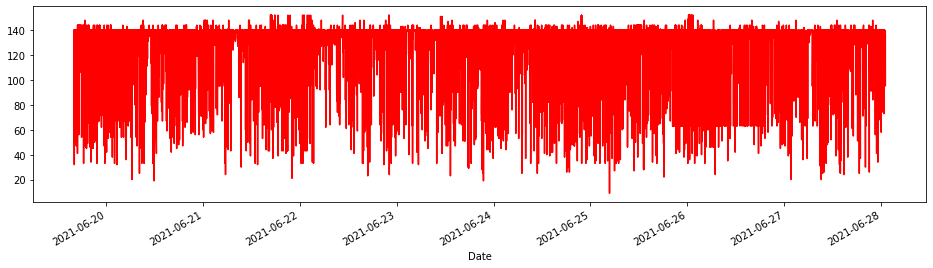

In [19]:
tlen.plot(figsize=(16,4), color='r');

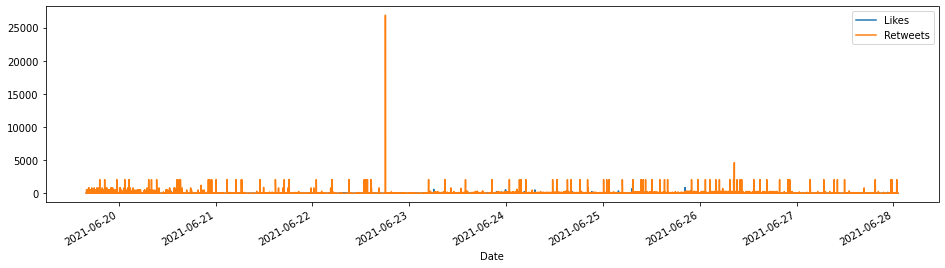

In [21]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [22]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter Web App
* Twitter for Android
* Twitter for iPad
* Twitter for iPhone
* TweetDeck
* V Droider
* GroundNews
* Ralph1
* IFTTT
* Hootsuite Inc.
* WordPress.com
* Developer_RTBot
* arsh-twitter-bot
* LaterMedia
* Twitterrific for iOS
* Zoho Social
* loveisnottourismSP
* Missinglettr
* dlvr.it
* Stream App 1
* TweetCaster for Android
* Blog2Social APP
* Instagram
* 1dfc
* Eco Promotions
* Bills Bot
* motivationQbot
* MeetEdgar
* WhistleBlower Information
* My1stNewApp
* Rob Otto Bot Twitter
* dbkrootbot
* Rosetta App
* fluttbot
* retweet LiberalHypocrisy
* VP Trusted News
* The Global Herald
* Twitter Media Studio - LiveCut
* Tweecha Lite
* twittbot.net
* poc_tweet_bot
* Continuous Learning
* Hocalwire Social Share
* SmartNews | スマートニュース
* Marokko.nl
* Mark the Bot 
* retweer master
* Insane Dev Bot
* _funbot
* Bot697
* Web design Retweet
* Coding NinjaBOT
* Shore News Network
* francisbean
* JGio Bot
* enterprise-apps-bot
* Retweetteuse
* Woofy Social

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12510 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12517 missing from current font.
  font.set_

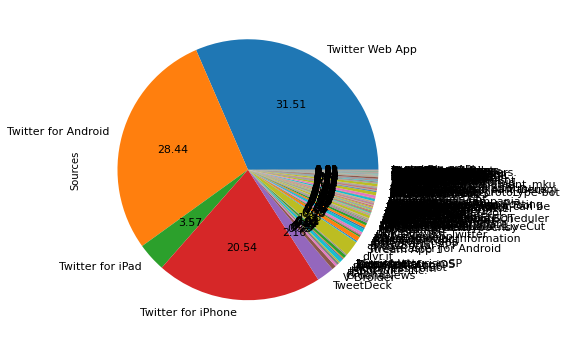

In [23]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

# Sentiment analysis


In [24]:
!pip install TextBlob

In [25]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [26]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,#JoeBiden is so slow it takes him an hour and ...,96,1409317468078854145,2021-06-28 01:07:22,Twitter Web App,0,0,-1
1,Just here to bang t-shirt\nAvailable on Amazon...,137,1409317283093168130,2021-06-28 01:06:38,Twitter for Android,1,0,1
2,RT @andykupf: Biden’s gotten more than his fai...,139,1409316489396690946,2021-06-28 01:03:29,Twitter for iPad,0,27,1
3,RT @DrEstella: .@POTUS @JoeBiden #JoeBiden hah...,139,1409316400062205954,2021-06-28 01:03:08,Twitter for Android,0,23,1
4,RT @andykupf: Biden’s gotten more than his fai...,139,1409316187767513094,2021-06-28 01:02:17,Twitter for Android,0,27,1
5,RT @Antonio78158191: Que pronto sustituyó #Joe...,95,1409315664356065285,2021-06-28 01:00:12,Twitter for Android,0,63,0
6,RT @casalsbate: El hombre empezó a calentar lo...,140,1409315417336823808,2021-06-28 00:59:13,Twitter for Android,0,29,0
7,#JoeBiden is #Pro_Human_Rights\nJoe Biden warn...,139,1409314469990256641,2021-06-28 00:55:28,Twitter Web App,1,0,1
8,RT @andykupf: Biden’s gotten more than his fai...,139,1409313915805306883,2021-06-28 00:53:15,Twitter for iPad,0,27,1
9,RT @ayfaraho: الرئيس المقبل للولايات المتحدة ا...,139,1409313052416167938,2021-06-28 00:49:50,Twitter Web App,0,2060,0


In [27]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [28]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 23.12075388998466%
Percentage of neutral tweets: 62.70728322010373%
Percentage de negative tweets: 14.171962889911608%
